## Construct the EDA report for your dataset.
#### ▪ Students with mod( ID_last_two_digits, 2) = 0 will use Boston Housing Data
#### ▪ Students with mod( ID_last_two_digits, 2) = 1 will use Wine Quality Data.


In [21]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn import datasets
import statsmodels as sts
import statsmodels.api as sm
from scipy import stats
# import plotly as py
# from plotly.offline import iplot
# import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
%matplotlib inline


In [8]:
roll="20228067"
a=roll[len(roll)-2:len(roll)]
x=int(a)
x

67

In [18]:
# X is the two last digits of my ID
roll="20228067"
ID_last_two_digits=int(roll[len(roll)-2:len(roll)])
mod=ID_last_two_digits%2
print("ID_last_two_digits: "+str(ID_last_two_digits))
print("Output : "+ str(mod))

ID_last_two_digits: 67
Output : 1


#### 1(i) Read the data and construct some appropriate graphs for each of the variables with interpretation.

In [117]:
df=pd.read_csv("winequality-white.csv",delimiter=";")

##### Appending the rows given in the assignment including the last 2 digits of ID with a decimal point

In [118]:
datarowsSeries = [pd.Series([7.8,.88,0.00,1.9,0.09,25.0,67.0,.991,3.22,0.68,9.8,5], index=df.columns ),
pd.Series([7.2,.83,0.01,2.2,0.19,15.0,60.0,.996,3.52,0.55,9.6,6], index=df.columns ),
pd.Series([7.9,.89,0.01,1.7,0.08,22.0,57.0,.997,3.26,0.64,9.8,2], index=df.columns ),
pd.Series([7.7,.86,0.02,2.3,0.07,11.0,38.0,.994,3.12,0.08,9.4,3], index=df.columns ) ]
newDf=pd.DataFrame(datarowsSeries)

# X is the two last digits of my ID with decimal point 
X=.67

# Adding last two digits of my id with decimal poitnt dynamically 
for item in newDf:
   newDf[item]=newDf[item]+X

newDf

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           8.47              1.55         0.67            2.57       0.76   
1           7.87              1.50         0.68            2.87       0.86   
2           8.57              1.56         0.68            2.37       0.75   
3           8.37              1.53         0.69            2.97       0.74   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                25.67                 67.67    1.661  3.89       1.35   
1                15.67                 60.67    1.666  4.19       1.22   
2                22.67                 57.67    1.667  3.93       1.31   
3                11.67                 38.67    1.664  3.79       0.75   

   alcohol  quality  
0    10.47     5.67  
1    10.27     6.67  
2    10.47     2.67  
3    10.07     3.67

In [119]:
# Append the data set to main data set 
df_white=df.append(newDf,ignore_index=True)
df_white

C:\Users\sobuj\AppData\Local\Temp\ipykernel_16220\1823316382.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_white=df.append(newDf,ignore_index=True)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.00              0.27         0.36           20.70      0.045   
1              6.30              0.30         0.34            1.60      0.049   
2              8.10              0.28         0.40            6.90      0.050   
3              7.20              0.23         0.32            8.50      0.058   
4              7.20              0.23         0.32            8.50      0.058   
...             ...               ...          ...             ...        ...   
4897           6.00              0.21         0.38            0.80      0.020   
4898           8.47              1.55         0.67            2.57      0.760   
4899           7.87              1.50         0.68            2.87      0.860   
4900           8.57              1.56         0.68            2.37      0.750   
4901           8.37              1.53         0.69            2.97      0.740   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   45.00                170.00  1.00100  3.00       0.45   
1                   14.00                132.00  0.99400  3.30       0.49   
2                   30.00                 97.00  0.99510  3.26       0.44   
3                   47.00                186.00  0.99560  3.19       0.40   
4                   47.00                186.00  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4897                22.00                 98.00  0.98941  3.26       0.32   
4898                25.67                 67.67  1.66100  3.89       1.35   
4899                15.67                 60.67  1.66600  4.19       1.22   
4900                22.67                 57.67  1.66700  3.93       1.31   
4901                11.67                 38.67  1.66400  3.79       0.75   

      alcohol  quality  
0        8.80     6.00  
1        9.50     6.00  
2       10.10     6.00  
3        9.90     6.00  
4        9.90     6.00  
...       ...      ...  
4897    11.80     6.00  
4898    10.47     5.67  
4899    10.27     6.67  
4900    10.47     2.67  
4901    10.07     3.67  

[4902 rows x 12 columns]

##### The wine in a scale that ranges from 0 (very bad) to 10 (excellent). Now, you need to reallocate the quality of wine as 0: 0 to 5 (Average quality) and 1: 6 to 10 (Good quality). Use the following codes to do so 

In [156]:
# Good=Quality>5 and Bad=Quality<=5, defining 0: Bad and 1: Good respectively
 
df_white['quality_new']=df_white['quality']
df_white['quality_new']=df_white['quality_new'].where(df_white['quality']>=5,0)
df_white['quality_new']=df_white['quality_new'].where(df_white['quality']<5,1)
df_white['quality_new']=df_white['quality_new'].map({0:'Bad',1:'Good'})
df_white.quality_new.value_counts()

Good    4717
Bad      185
Name: quality_new, dtype: int64

In [157]:
df_white[['quality_new','quality']]

quality_new  quality
0           Good     6.00
1           Good     6.00
2           Good     6.00
3           Good     6.00
4           Good     6.00
...          ...      ...
4897        Good     6.00
4898        Good     5.67
4899        Good     6.67
4900         Bad     2.67
4901         Bad     3.67

[4902 rows x 2 columns]

In [141]:
df_white["quality"].describe().T

count    4902.000000
mean        5.876924
std         0.887100
min         2.670000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

##### Follow the below historgam for each of the variables

count    4902.000000
mean        6.855983
std         0.844596
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000
Name: fixed acidity, dtype: float64


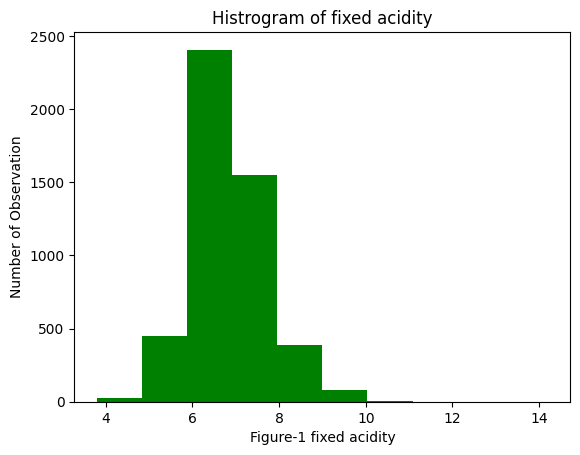

count    4902.000000
mean        0.279267
std         0.106957
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.560000
Name: volatile acidity, dtype: float64


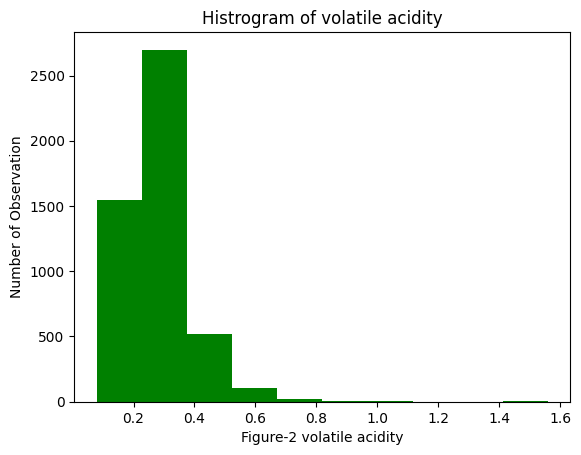

count    4902.000000
mean        0.334474
std         0.121373
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64


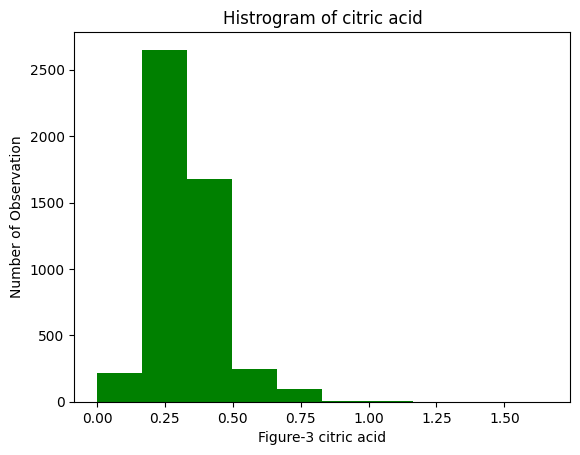

count    4902.000000
mean        6.388399
std         5.071091
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64


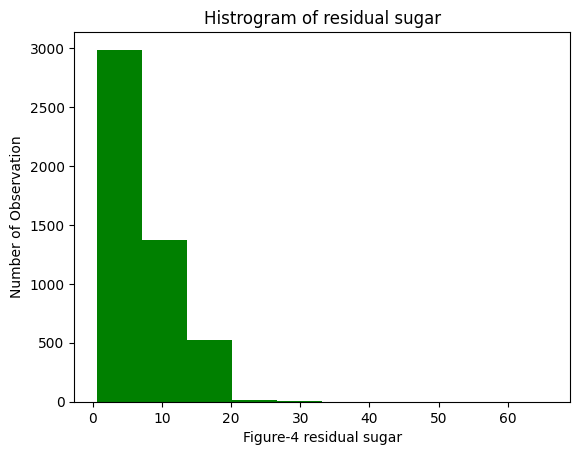

count    4902.000000
mean        0.046369
std         0.030257
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.860000
Name: chlorides, dtype: float64


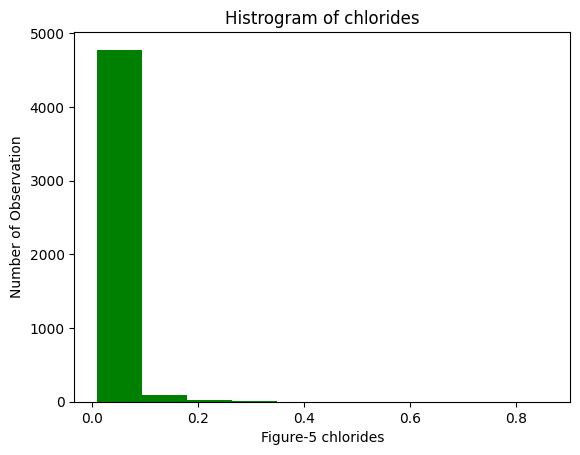

count    4902.000000
mean       35.294712
std        17.007372
min         2.000000
25%        23.000000
50%        34.000000
75%        46.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64


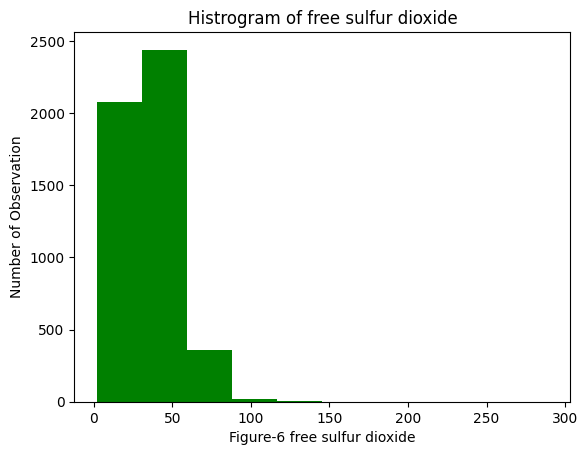

count    4902.000000
mean      138.293590
std        42.546615
min         9.000000
25%       108.000000
50%       134.000000
75%       167.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64


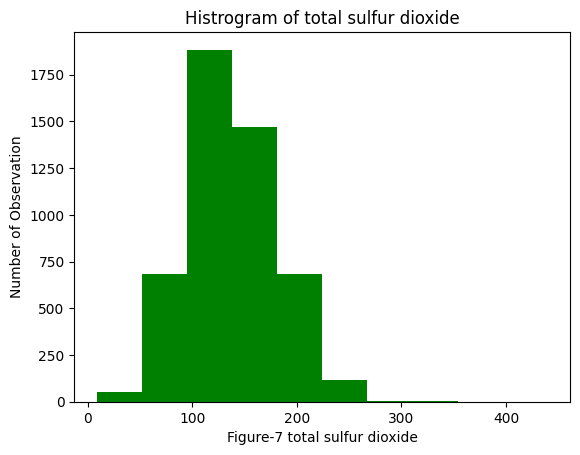

count    4902.000000
mean        0.994574
std         0.019379
min         0.987110
25%         0.991730
50%         0.993750
75%         0.996100
max         1.667000
Name: density, dtype: float64


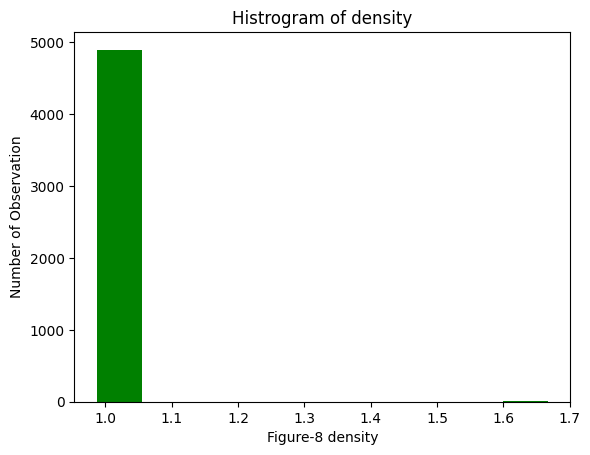

count    4902.000000
mean        3.188888
std         0.152557
min         2.720000
25%         3.090000
50%         3.180000
75%         3.280000
max         4.190000
Name: pH, dtype: float64


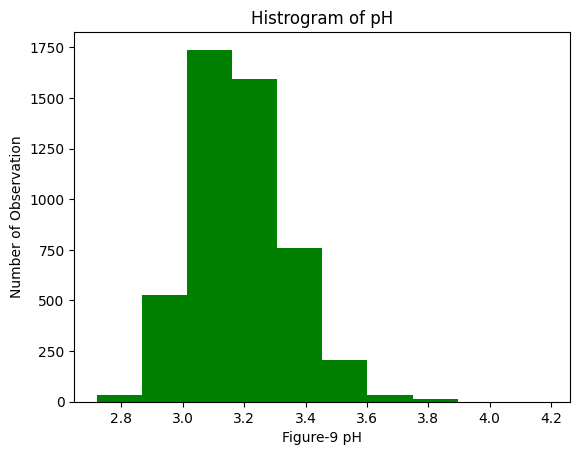

count    4902.000000
mean        0.490392
std         0.115864
min         0.220000
25%         0.410000
50%         0.470000
75%         0.550000
max         1.350000
Name: sulphates, dtype: float64


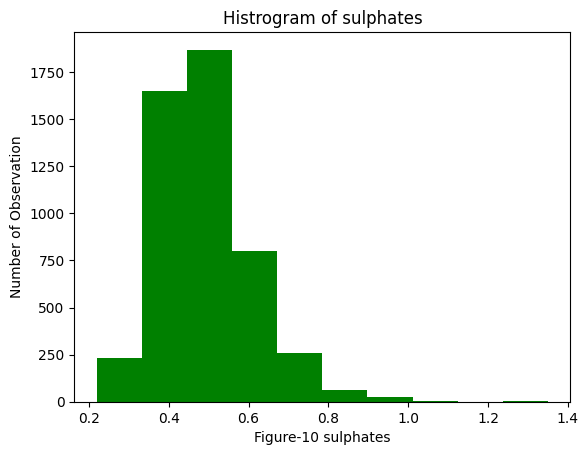

count    4902.000000
mean       10.514109
std         1.230140
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64


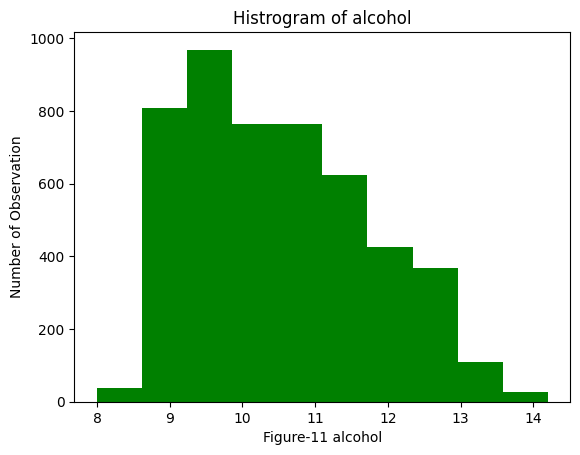

count    4902.000000
mean        5.876924
std         0.887100
min         2.670000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


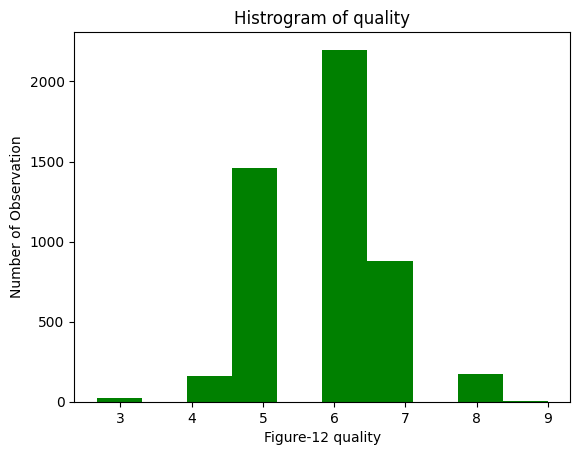

In [142]:
indx=0
for col in df.columns:
    indx=indx+1
    print(df_white[col].describe())
    plt.hist(df_white[col],bins=10,color = "green")
    plt.xlabel('Figure-'+str(indx)+ ' '+col)
    plt.ylabel('Number of Observation')
    plt.title('Histrogram of '+ col)
    plt.show()

In [145]:
df_white.quality.mode().T

0    6.0
Name: quality, dtype: float64

In [147]:
df_white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.00              0.27         0.36           20.70      0.045   
1              6.30              0.30         0.34            1.60      0.049   
2              8.10              0.28         0.40            6.90      0.050   
3              7.20              0.23         0.32            8.50      0.058   
4              7.20              0.23         0.32            8.50      0.058   
...             ...               ...          ...             ...        ...   
4897           6.00              0.21         0.38            0.80      0.020   
4898           8.47              1.55         0.67            2.57      0.760   
4899           7.87              1.50         0.68            2.87      0.860   
4900           8.57              1.56         0.68            2.37      0.750   
4901           8.37              1.53         0.69            2.97      0.740   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   45.00                170.00  1.00100  3.00       0.45   
1                   14.00                132.00  0.99400  3.30       0.49   
2                   30.00                 97.00  0.99510  3.26       0.44   
3                   47.00                186.00  0.99560  3.19       0.40   
4                   47.00                186.00  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4897                22.00                 98.00  0.98941  3.26       0.32   
4898                25.67                 67.67  1.66100  3.89       1.35   
4899                15.67                 60.67  1.66600  4.19       1.22   
4900                22.67                 57.67  1.66700  3.93       1.31   
4901                11.67                 38.67  1.66400  3.79       0.75   

      alcohol  quality quality_new  
0        8.80     6.00         Bad  
1        9.50     6.00         Bad  
2       10.10     6.00         Bad  
3        9.90     6.00         Bad  
4        9.90     6.00         Bad  
...       ...      ...         ...  
4897    11.80     6.00         Bad  
4898    10.47     5.67         Bad  
4899    10.27     6.67         Bad  
4900    10.47     2.67        Good  
4901    10.07     3.67        Good  

[4902 rows x 13 columns]

## Bivariate


<AxesSubplot:>

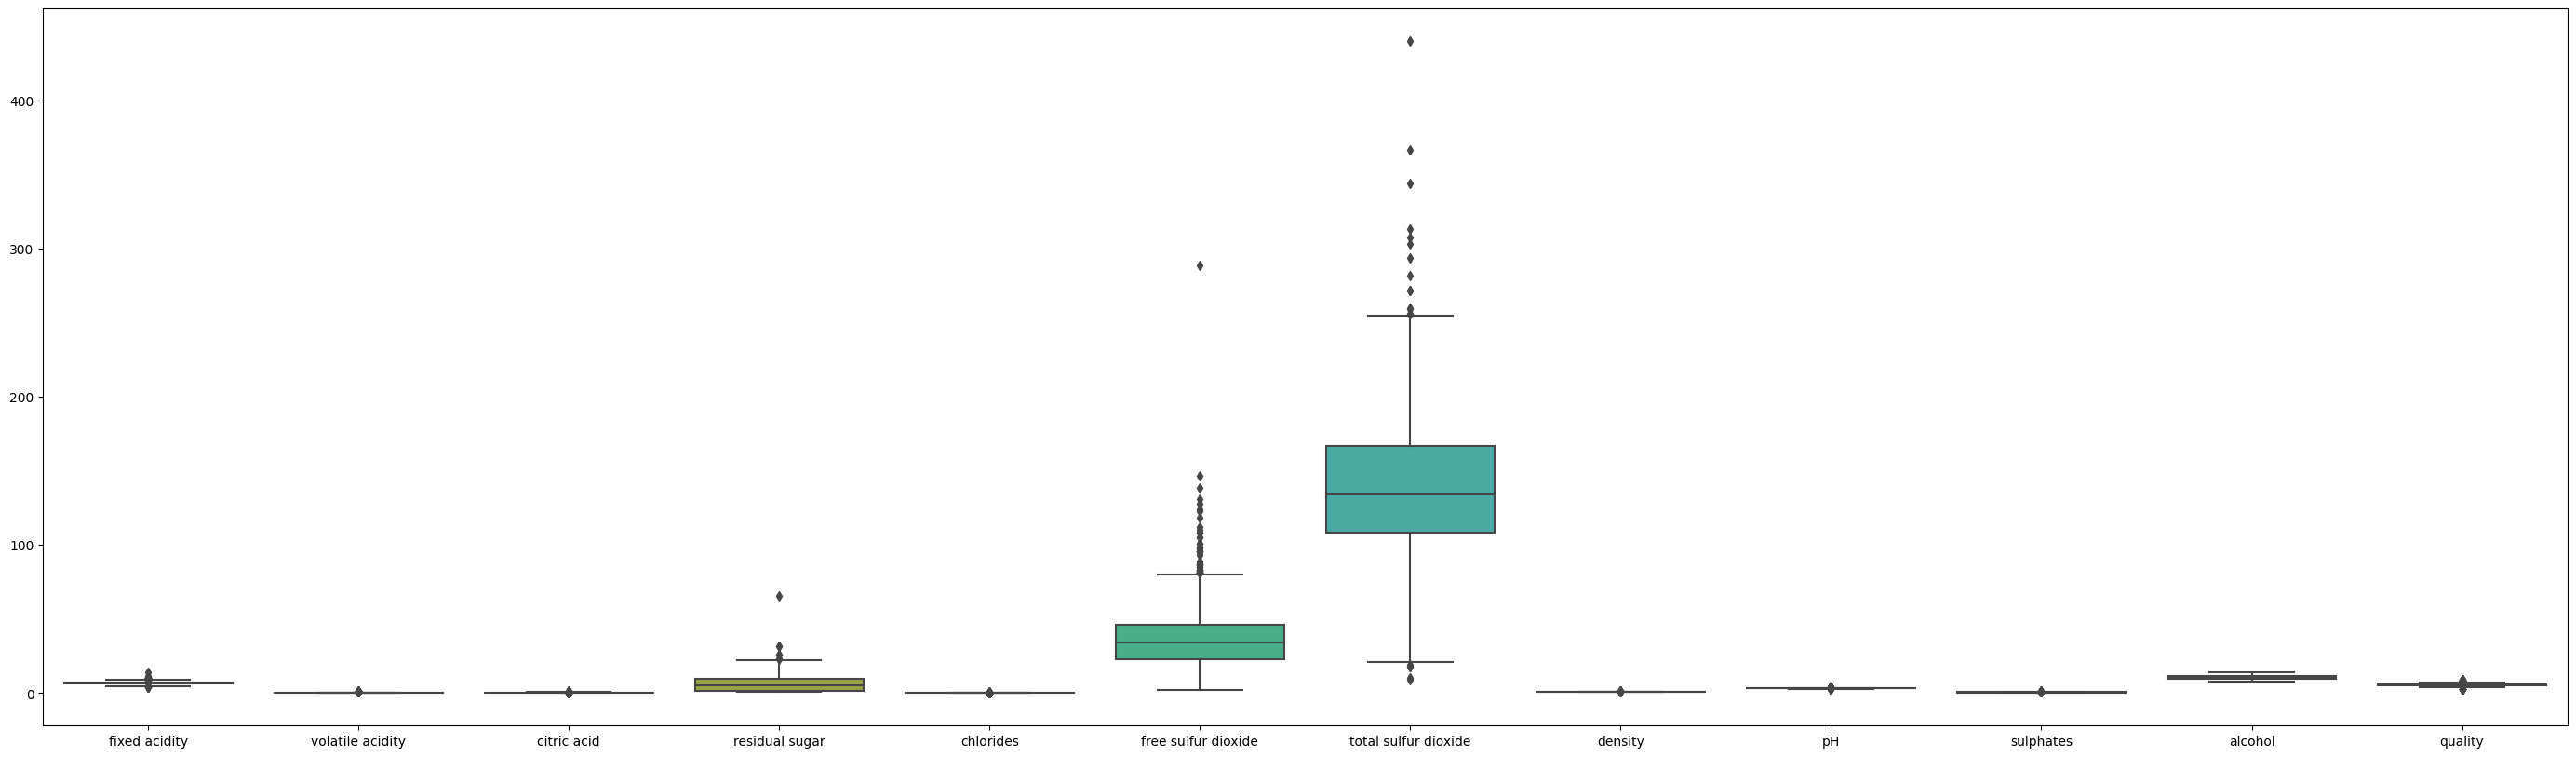

In [158]:
# I have shown all data in one box plot, we can see the difference in data and see some outliers.

plt.figure(figsize=(35,10))
sns.boxplot(data=df_white)


Text(0.5, 1.0, 'Citric Acid Vs Quality')

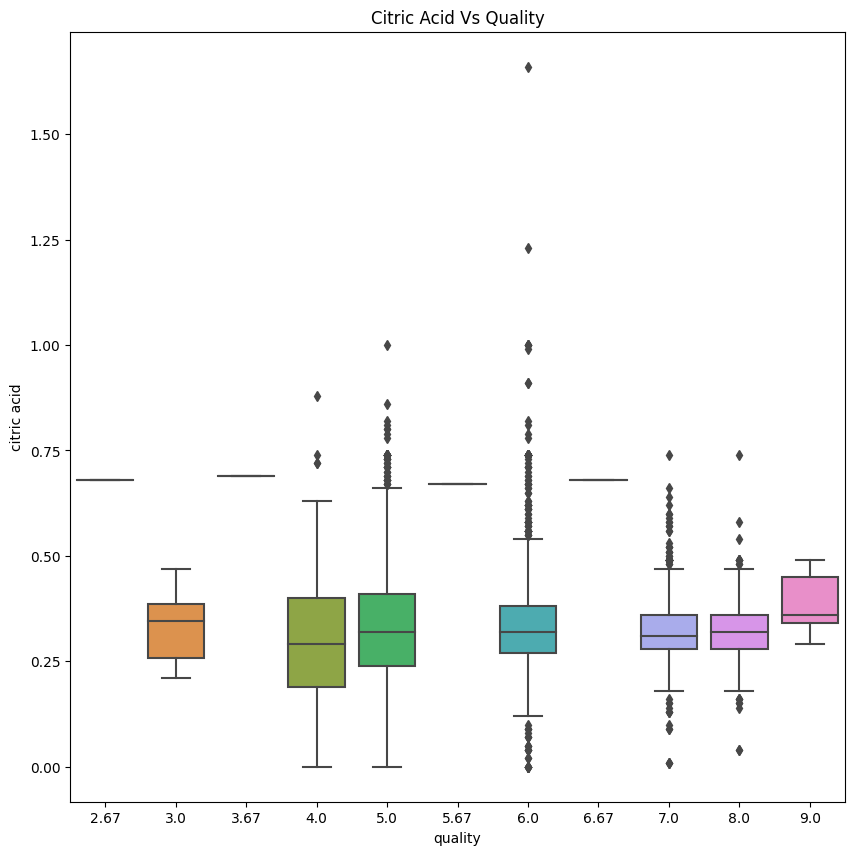

In [159]:
plt.figure(figsize=(10,10))
sns.boxplot(x='quality', y='citric acid', data=df_white[["citric acid","quality"]])
plt.title('Citric Acid Vs Quality')


## Multivariate 

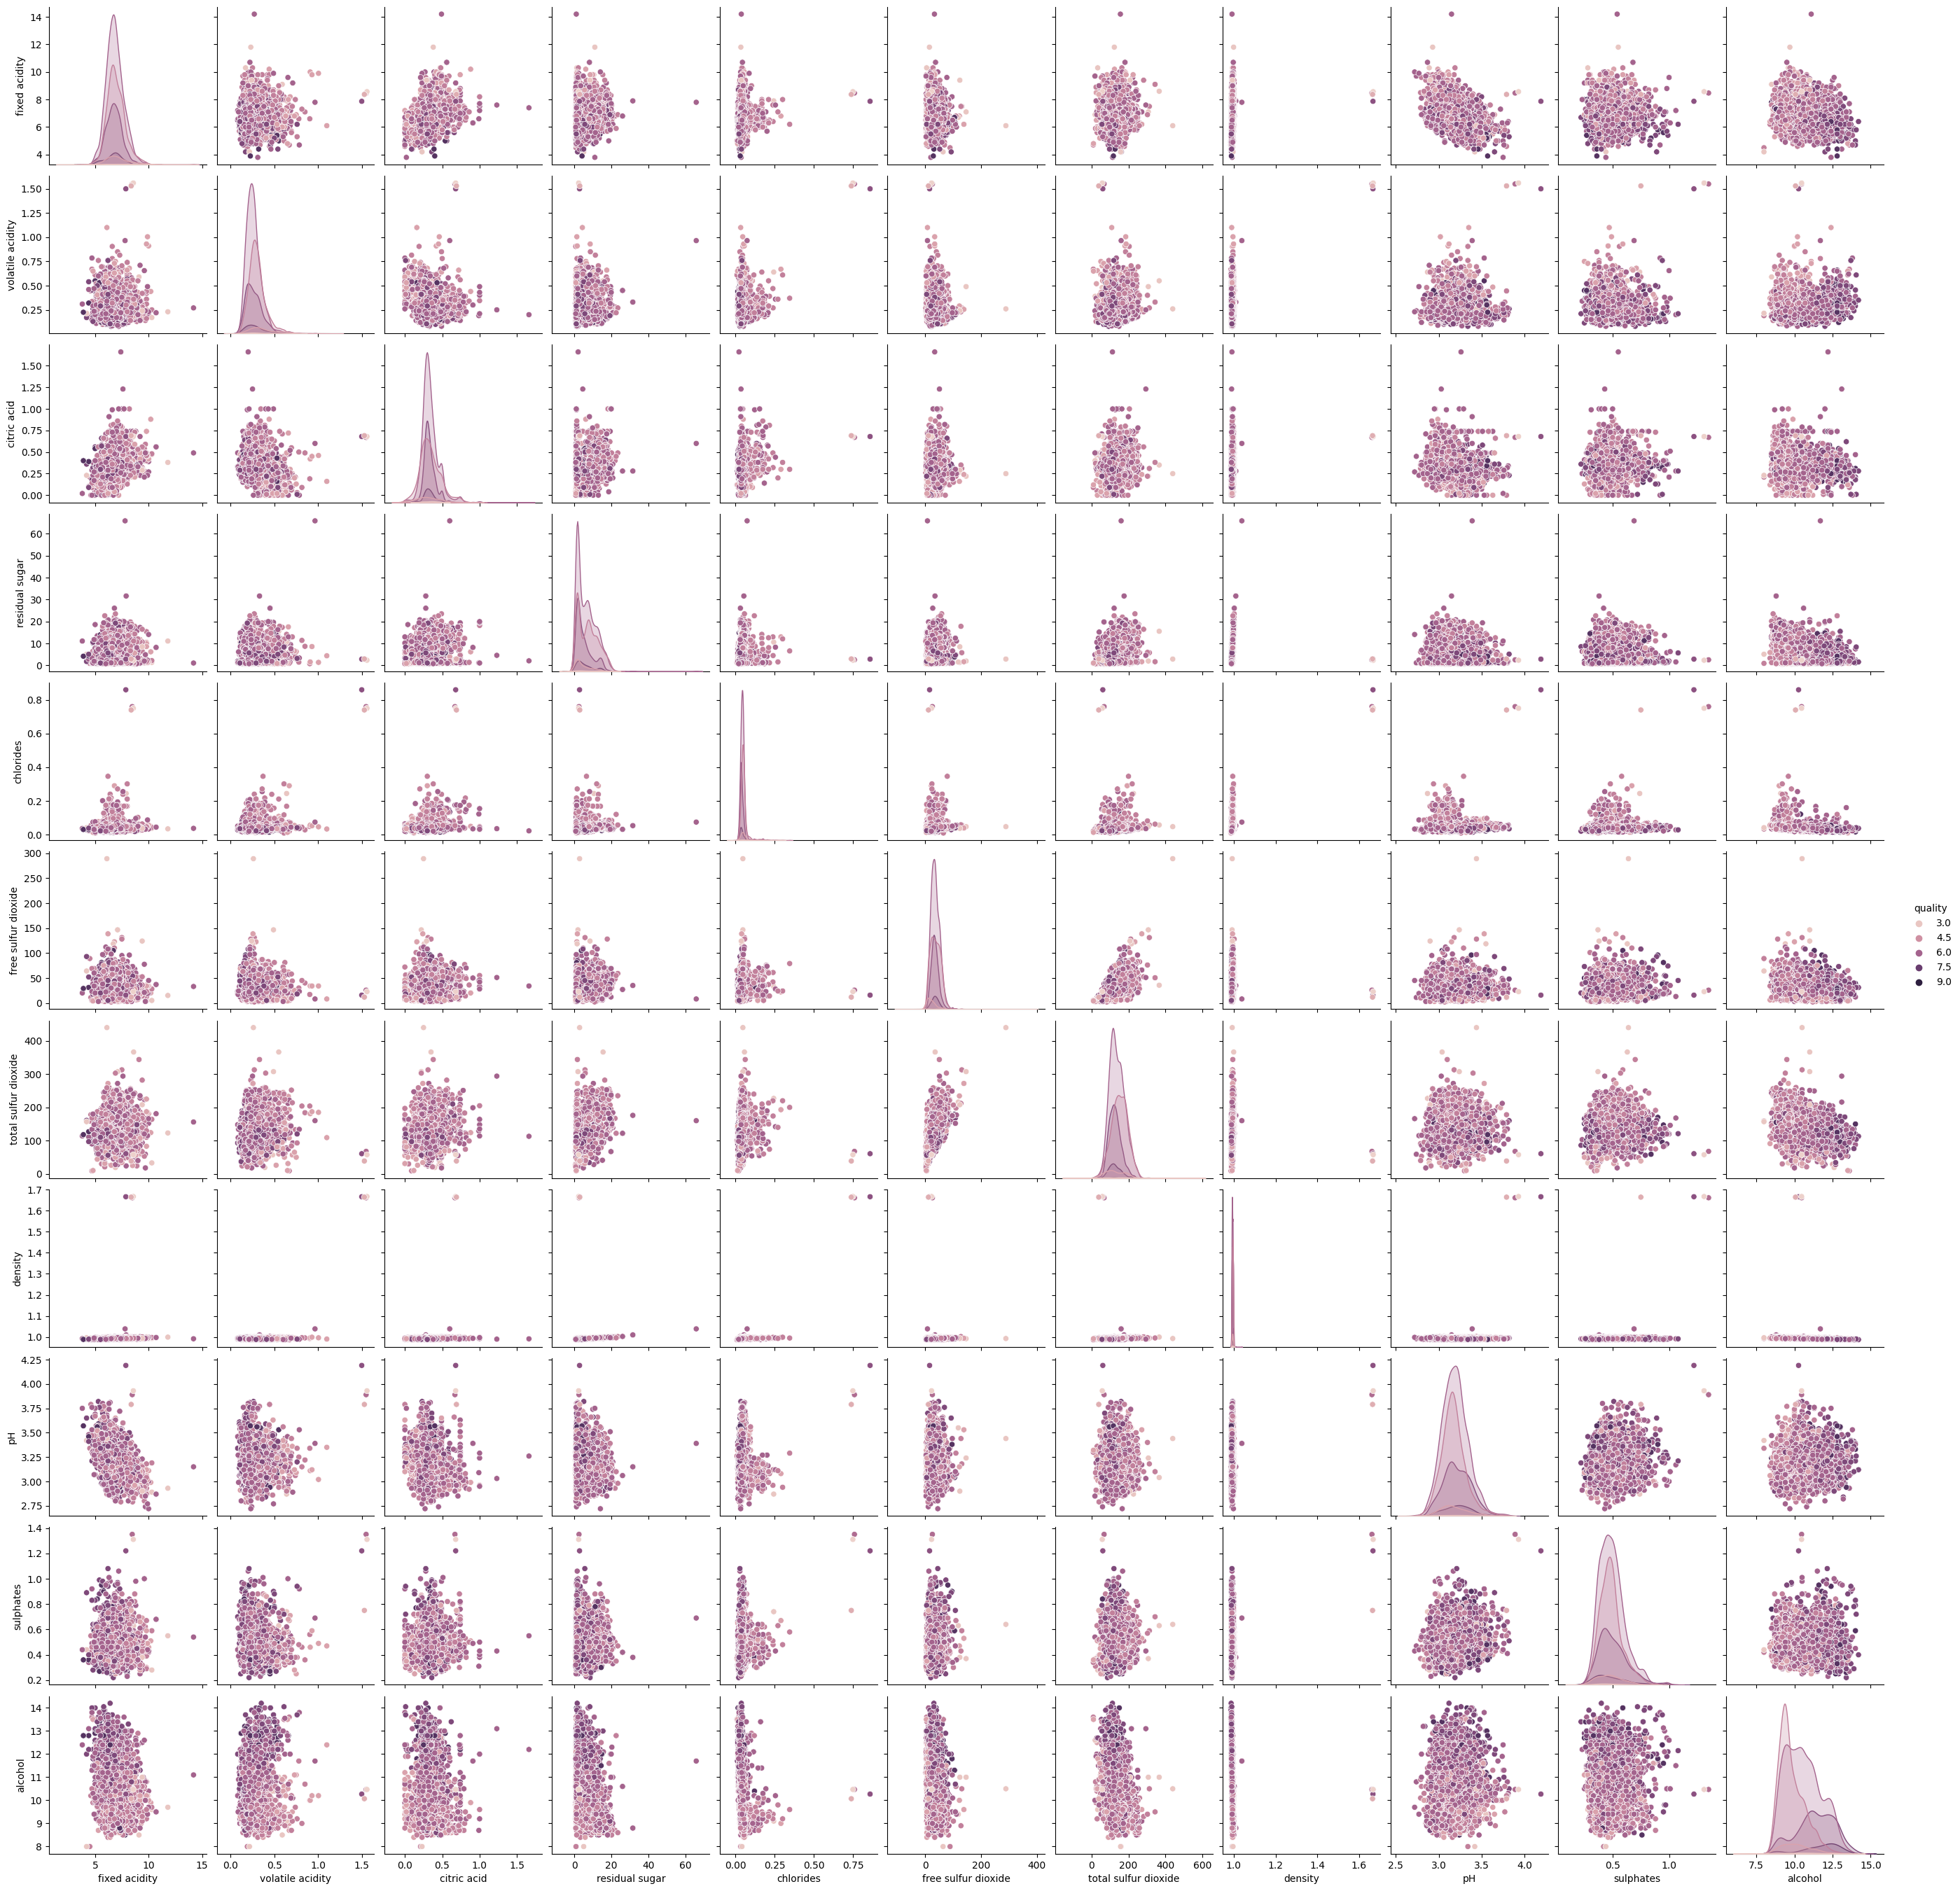

In [163]:
sns.color_palette("Set3", 10)
sns.pairplot(df_white,hue="quality")

Figure 1 shows that overall fixed acidity of white wine is symmetric and middle 50% has the symmetric distribution with an average 6.8 and also there are outliers. Figure 3 also gives the similar information about the shape of the
distribution and majority fixed acid values are in a range of 6 to 8.


#### (ii) Calculate some measures (if appropriate), for instance, mean, median, mode, minimum, maximum, quartiles, Standard deviation, etc., for each of the variables according to their level of measurements. Also, calculate ovariance matrix and correlation-matrix of the variables.

In [169]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4902 non-null   float64
 1   volatile acidity      4902 non-null   float64
 2   citric acid           4902 non-null   float64
 3   residual sugar        4902 non-null   float64
 4   chlorides             4902 non-null   float64
 5   free sulfur dioxide   4902 non-null   float64
 6   total sulfur dioxide  4902 non-null   float64
 7   density               4902 non-null   float64
 8   pH                    4902 non-null   float64
 9   sulphates             4902 non-null   float64
 10  alcohol               4902 non-null   float64
 11  quality               4902 non-null   float64
 12  quality_new           4902 non-null   object 
dtypes: float64(12), object(1)
memory usage: 498.0+ KB


In [164]:
##  Calculate some measures (if appropriate), for instance, mean, median, mode, minimum, maximum, quartiles, Standard deviation for each of the variables according to their level of measurements
df_white.describe().T


count        mean        std      min        25%  \
fixed acidity         4902.0    6.855983   0.844596  3.80000    6.30000   
volatile acidity      4902.0    0.279267   0.106957  0.08000    0.21000   
citric acid           4902.0    0.334474   0.121373  0.00000    0.27000   
residual sugar        4902.0    6.388399   5.071091  0.60000    1.70000   
chlorides             4902.0    0.046369   0.030257  0.00900    0.03600   
free sulfur dioxide   4902.0   35.294712  17.007372  2.00000   23.00000   
total sulfur dioxide  4902.0  138.293590  42.546615  9.00000  108.00000   
density               4902.0    0.994574   0.019379  0.98711    0.99173   
pH                    4902.0    3.188888   0.152557  2.72000    3.09000   
sulphates             4902.0    0.490392   0.115864  0.22000    0.41000   
alcohol               4902.0   10.514109   1.230140  8.00000    9.50000   
quality               4902.0    5.876924   0.887100  2.67000    5.00000   

                            50%       75%      max  
fixed acidity           6.80000    7.3000   14.200  
volatile acidity        0.26000    0.3200    1.560  
citric acid             0.32000    0.3900    1.660  
residual sugar          5.20000    9.9000   65.800  
chlorides               0.04300    0.0500    0.860  
free sulfur dioxide    34.00000   46.0000  289.000  
total sulfur dioxide  134.00000  167.0000  440.000  
density                 0.99375    0.9961    1.667  
pH                      3.18000    3.2800    4.190  
sulphates               0.47000    0.5500    1.350  
alcohol                10.40000   11.4000   14.200  
quality                 6.00000    6.0000    9.000

In [26]:
df_white.mode()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.8              0.28          0.3             1.2      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 29.0                 111.0    0.992  3.14        0.5   

   alcohol  quality  
0      9.4      6.0

In [27]:
df_white.mode()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.8              0.28          0.3             1.2      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 29.0                 111.0    0.992  3.14        0.5   

   alcohol  quality  
0      9.4      6.0

In [166]:
# covariance matrix
df_white.cov()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              0.713342         -0.000422     0.029921   
volatile acidity          -0.000422          0.011440    -0.001467   
citric acid                0.029921         -0.001467     0.014731   
residual sugar             0.376260          0.029047     0.056740   
chlorides                  0.001290          0.000904     0.000508   
free sulfur dioxide       -0.727299         -0.182890     0.188822   
total sulfur dioxide       3.164977          0.297835     0.599243   
density                    0.001470          0.000695     0.000243   
pH                        -0.053337          0.000293    -0.002775   
sulphates                 -0.000848          0.000275     0.001047   
alcohol                   -0.125648          0.008196    -0.011325   
quality                   -0.086587         -0.018627    -0.001331   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.376260   0.001290            -0.727299   
volatile acidity            0.029047   0.000904            -0.182890   
citric acid                 0.056740   0.000508             0.188822   
residual sugar             25.715963   0.007617            25.827977   
chlorides                   0.007617   0.000915             0.027820   
free sulfur dioxide        25.827977   0.027820           289.250714   
total sulfur dioxide       86.707221   0.135652           445.641127   
density                     0.010696   0.000417             0.005990   
pH                         -0.150856   0.000162            -0.011786   
sulphates                  -0.017470   0.000443             0.106865   
alcohol                    -2.809889  -0.009793            -5.226916   
quality                    -0.434195  -0.004731             0.138921   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     3.164977  0.001470 -0.053337  -0.000848   
volatile acidity                  0.297835  0.000695  0.000293   0.000275   
citric acid                       0.599243  0.000243 -0.002775   0.001047   
residual sugar                   86.707221  0.010696 -0.150856  -0.017470   
chlorides                         0.135652  0.000417  0.000162   0.000443   
free sulfur dioxide             445.641127  0.005990 -0.011786   0.106865   
total sulfur dioxide           1810.214409  0.022354 -0.035529   0.609373   
density                           0.022354  0.000376  0.000374   0.000390   
pH                               -0.035529  0.000374  0.023274   0.003113   
sulphates                         0.609373  0.000390  0.003113   0.013425   
alcohol                         -23.443178 -0.002975  0.022429  -0.002521   
quality                          -6.483276 -0.001474  0.012662   0.004849   

                        alcohol   quality  
fixed acidity         -0.125648 -0.086587  
volatile acidity       0.008196 -0.018627  
citric acid           -0.011325 -0.001331  
residual sugar        -2.809889 -0.434195  
chlorides             -0.009793 -0.004731  
free sulfur dioxide   -5.226916  0.138921  
total sulfur dioxide -23.443178 -6.483276  
density               -0.002975 -0.001474  
pH                     0.022429  0.012662  
sulphates             -0.002521  0.004849  
alcohol                1.513244  0.474530  
quality                0.474530  0.786946

In [168]:
# correlation-matrix
corrmat=df_white.corr()
corrmat

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.004676     0.291884   
volatile acidity          -0.004676          1.000000    -0.113038   
citric acid                0.291884         -0.113038     1.000000   
residual sugar             0.087849          0.053553     0.092186   
chlorides                  0.050468          0.279448     0.138453   
free sulfur dioxide       -0.050632         -0.100542     0.091473   
total sulfur dioxide       0.088076          0.065449     0.116042   
density                    0.089822          0.335465     0.103379   
pH                        -0.413950          0.017987    -0.149884   
sulphates                 -0.008667          0.022187     0.074469   
alcohol                   -0.120935          0.062290    -0.075849   
quality                   -0.115566         -0.196315    -0.012361   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.087849   0.050468            -0.050632   
volatile acidity            0.053553   0.279448            -0.100542   
citric acid                 0.092186   0.138453             0.091473   
residual sugar              1.000000   0.049642             0.299469   
chlorides                   0.049642   1.000000             0.054063   
free sulfur dioxide         0.299469   0.054063             1.000000   
total sulfur dioxide        0.401873   0.105375             0.615861   
density                     0.108838   0.711033             0.018174   
pH                         -0.194998   0.035099            -0.004542   
sulphates                  -0.029734   0.126307             0.054231   
alcohol                    -0.450436  -0.263099            -0.249835   
quality                    -0.096519  -0.176247             0.009208   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.088076  0.089822 -0.413950  -0.008667   
volatile acidity                  0.065449  0.335465  0.017987   0.022187   
citric acid                       0.116042  0.103379 -0.149884   0.074469   
residual sugar                    0.401873  0.108838 -0.194998  -0.029734   
chlorides                         0.105375  0.711033  0.035099   0.126307   
free sulfur dioxide               0.615861  0.018174 -0.004542   0.054231   
total sulfur dioxide              1.000000  0.027112 -0.005474   0.123614   
density                           0.027112  1.000000  0.126635   0.173900   
pH                               -0.005474  0.126635  1.000000   0.176141   
sulphates                         0.123614  0.173900  0.176141   1.000000   
alcohol                          -0.447916 -0.124812  0.119517  -0.017691   
quality                          -0.171774 -0.085762  0.093561   0.047177   

                       alcohol   quality  
fixed acidity        -0.120935 -0.115566  
volatile acidity      0.062290 -0.196315  
citric acid          -0.075849 -0.012361  
residual sugar       -0.450436 -0.096519  
chlorides            -0.263099 -0.176247  
free sulfur dioxide  -0.249835  0.009208  
total sulfur dioxide -0.447916 -0.171774  
density              -0.124812 -0.085762  
pH                    0.119517  0.093561  
sulphates            -0.017691  0.047177  
alcohol               1.000000  0.434848  
quality               0.434848  1.000000

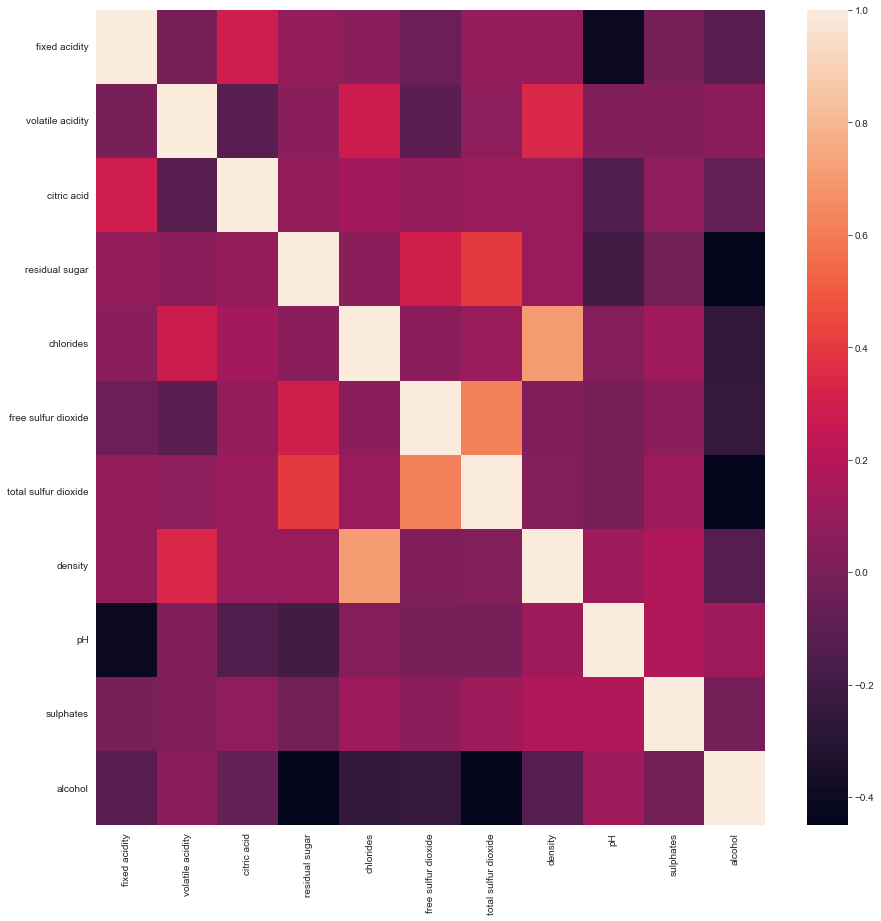

In [47]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corrmat);


#### (iii) Construct the pair plots of those variables with different colors for different wine qualities (Good >5, Bad<=5) in Wine Quality Data.


In [108]:


 
#






Bad     3260
Good    1642
Name: quality, dtype: int64

In [109]:

df_white["quality"].unique()

array(['Bad', 'Good'], dtype=object)

<Figure size 1200x600 with 0 Axes>

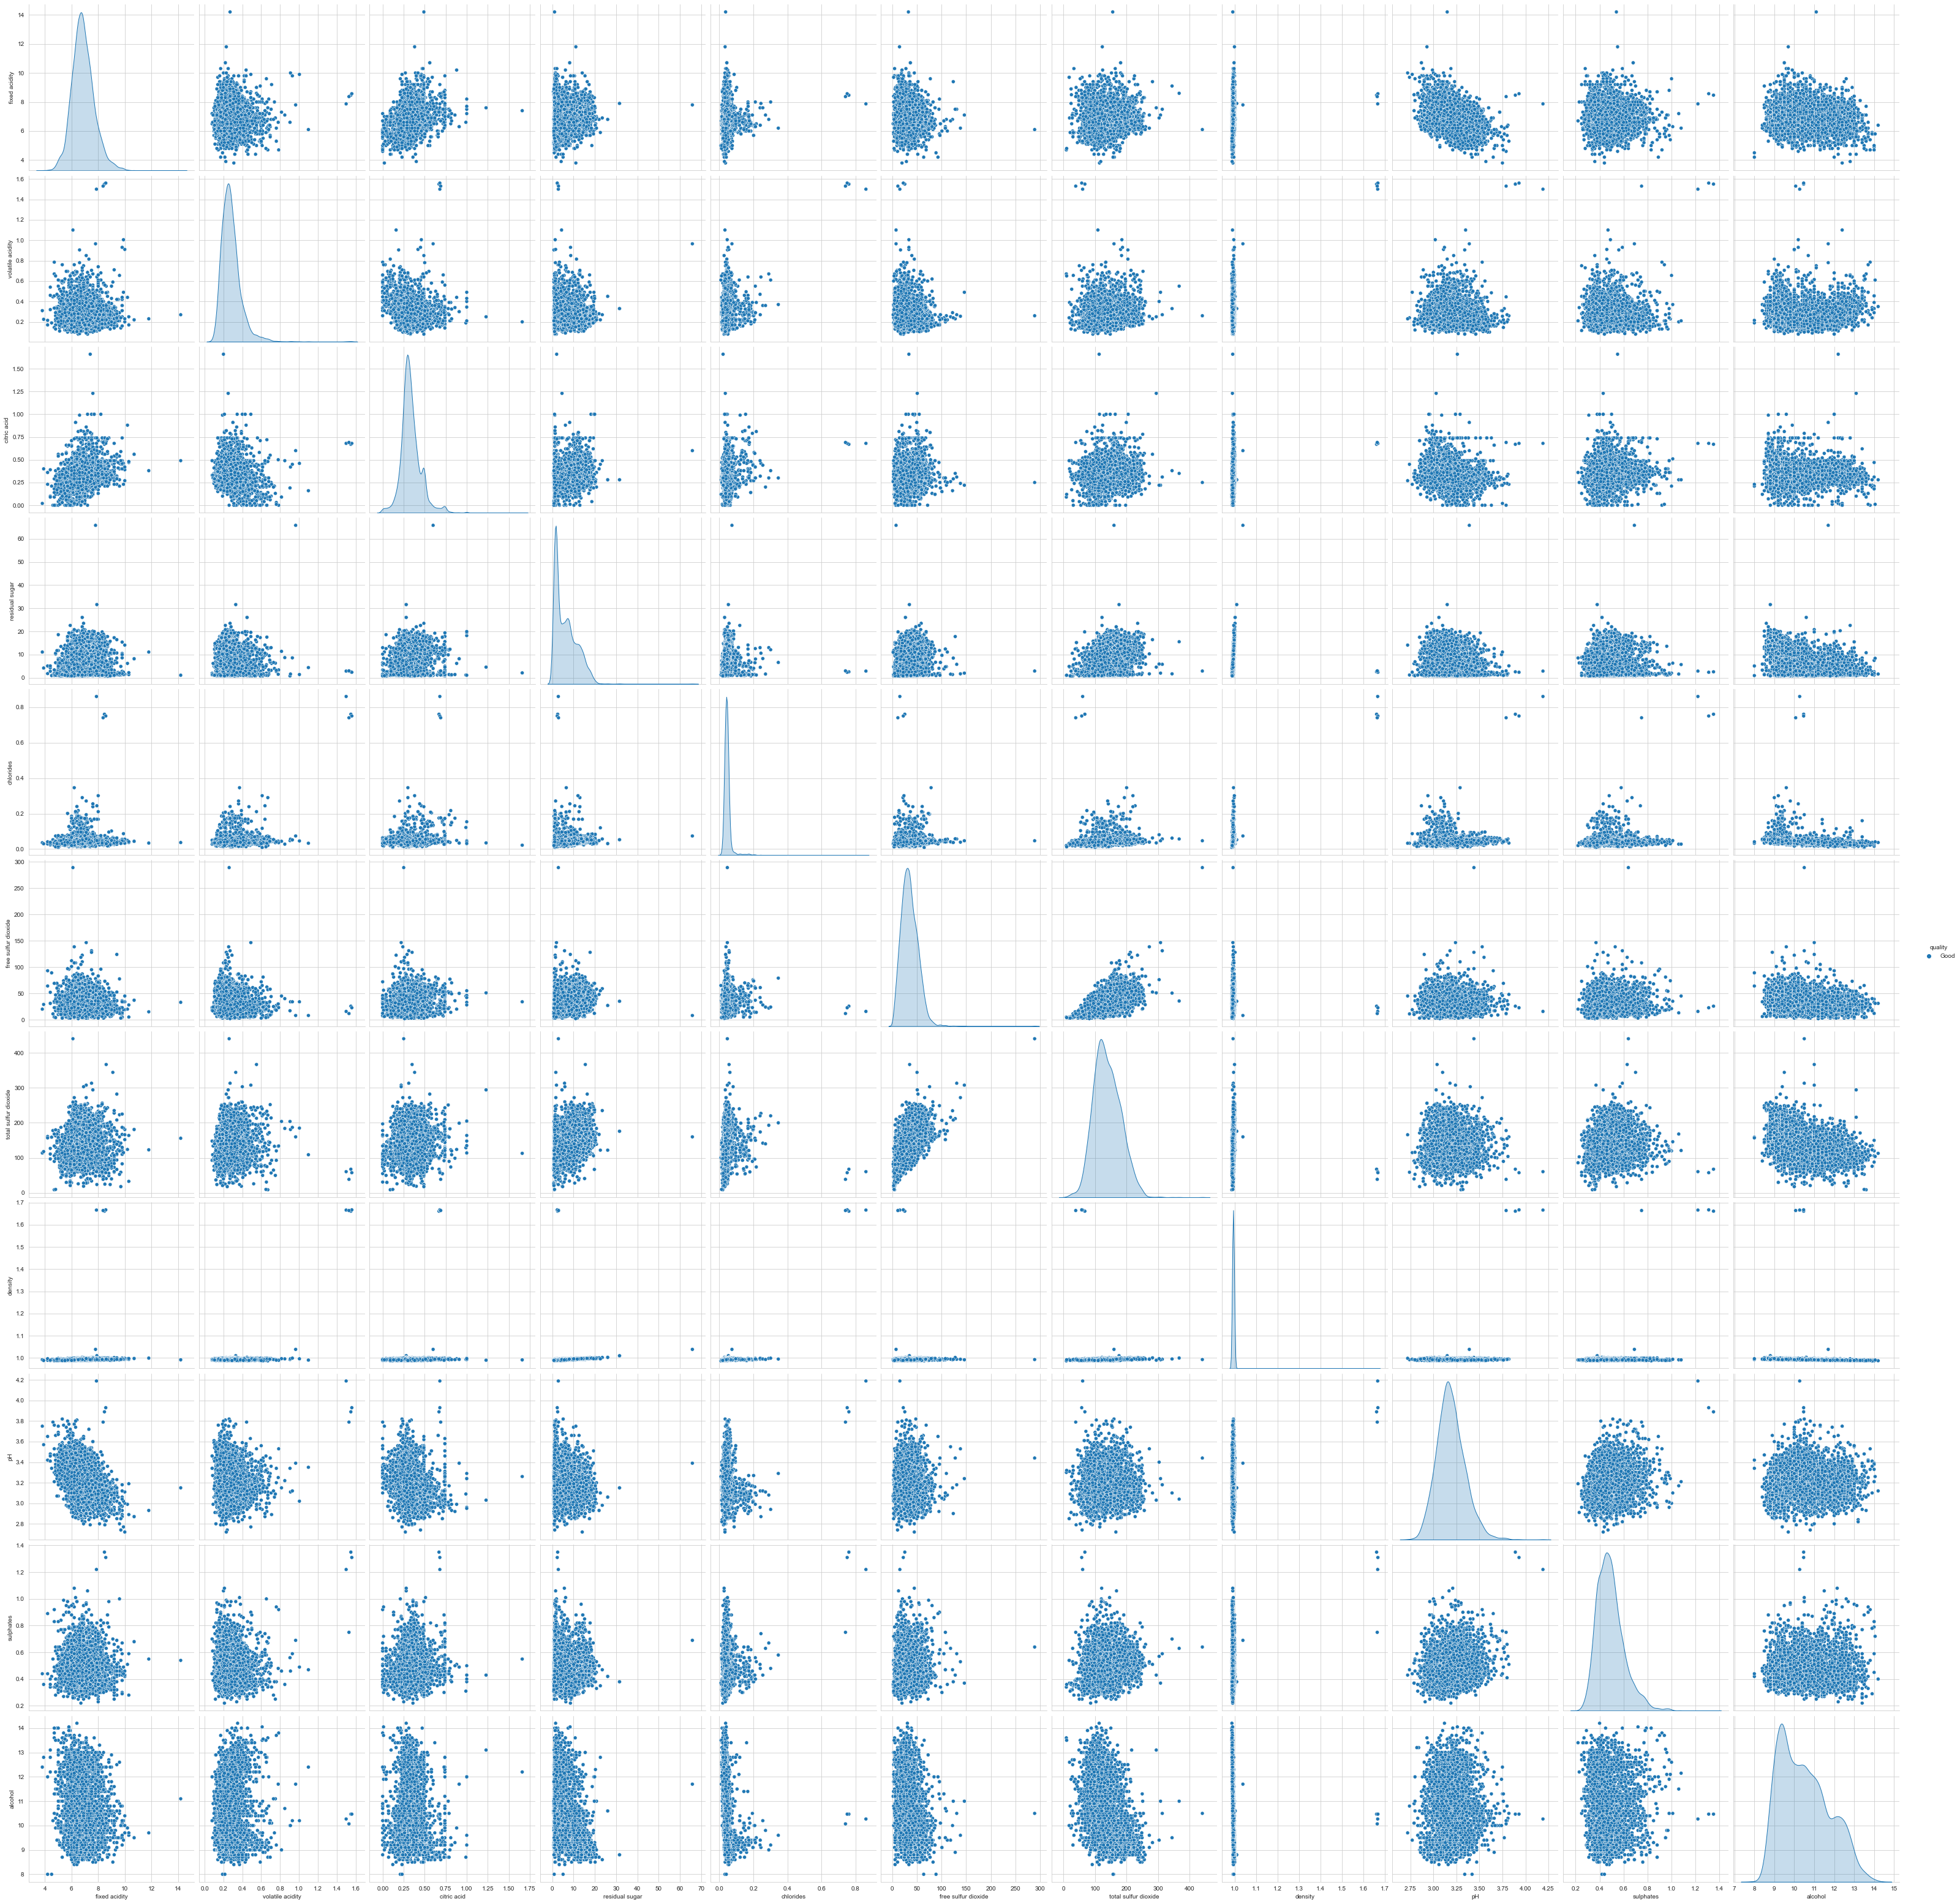

In [42]:
# Paire Plot
plt.figure(figsize = (12,6))
sns.set_style('whitegrid')
sns.pairplot(df_white, hue ='quality', height = 4)
plt.show()

# Data Preprocessing

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train,y_train,x_test,y_test=train_test_split(
#     x_res,y_res,test_size=0.2,random_state=0
# )

## Logistic Regrassion

In [203]:
# Arrange data
x = df_white.drop(['quality','quality_new'],axis='columns')
y = df_white['quality_new']

# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=999) # 70% training and 30% test
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred=logmodel.predict(X_test)
print(y_pred)


['Good' 'Good' 'Good' ... 'Good' 'Good' 'Good']


C:\Users\sobuj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

logitmodel = sm.Logit(y,x)
result=logitmodel.fit()
print(result.summary2() )

conX= sm.add_constant(x)
logitmodel2=sm.Logit(y,conX)
result2=logitmodel2.fit()
print(result2.summary2())

In [206]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('############# Logistic Reg ###############')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


############# Logistic Reg ###############
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        54
        Good       0.96      1.00      0.98      1417

    accuracy                           0.96      1471
   macro avg       0.48      0.50      0.49      1471
weighted avg       0.93      0.96      0.95      1471

[[   0   54]
 [   0 1417]]
0.9632902787219578


C:\Users\sobuj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sobuj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sobuj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334

In [ ]:
# from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred=logmodel.predict(X_test)
## calculate the fpr and tpr for all thresholds of the classification
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
auc4 = roc_auc_score(y_test, preds)
print('LR AUC4:', auc4)
###Get the ROC Curve
fpr4, tpr4, thresholds5 = roc_curve(y_test, preds)
####Plot ROC Curve 
plt.figure()
lw = 2
plt.plot(fpr4, tpr4, color='orange',lw=lw, label='LR(AUC = %0.4f)' % auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
##plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [208]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Finding the Predictive value positive and Predictive value negative using formula
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
print("Accuracy Value:", (tp+tn)/(tp+tn+fp+fn))
print("Sensitivity Value:",tp/(tp+fn))
print("Specificity Valus:", tn/(tn+fp))
print("Predictive Value Positive:", tp/(tp+fp))
print("Predictive Value Negetive:", tn/(tn+fn))


Accuracy Value: 0.9632902787219578
Sensitivity Value: 0.0
Specificity Valus: 1.0
Predictive Value Positive: nan
Predictive Value Negetive: 0.9632902787219578


C:\Users\sobuj\AppData\Local\Temp\ipykernel_16220\991896399.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  print("Predictive Value Positive:", tp/(tp+fp))


# Decision Tree

In [209]:
DTclf=tree.DecisionTreeClassifier()

DTclf.fit(X_train, y_train)
y_pred= DTclf.predict(X_test) ##y_test

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('############# DT ###############')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


############# DT ###############
              precision    recall  f1-score   support

         Bad       0.33      0.31      0.32        54
        Good       0.97      0.98      0.97      1417

    accuracy                           0.95      1471
   macro avg       0.65      0.65      0.65      1471
weighted avg       0.95      0.95      0.95      1471

[[  17   37]
 [  35 1382]]
0.9510537049626104


In [211]:
DTclf=tree.DecisionTreeClassifier()
DTclf.fit(X_train, y_train)
#####Predict probabilities for the test data.
probsDT = DTclf.predict_proba(X_test)
####Keep Probabilities of the positive class only.
probsDT = probsDT[:, 1]

###Compute the AUC Score.
auc = roc_auc_score(y_test, probsDT)
print('DT AUC:', auc)
###Get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probsDT)
####Plot ROC Curve 
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='DT(AUC = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
##plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


DT AUC: 0.6553752058339215


ValueError: y_true takes value in {'Bad', 'Good'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [210]:
cm1 = confusion_matrix(y_test,y_pred)
print('\n Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Finding the Predictive value positive and Predictive value negative using formula
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
print("Accuracy Value:", (tp+tn)/(tp+tn+fp+fn))
print("Sensitivity Value:",tp/(tp+fn))
print("Specificity Valus:", tn/(tn+fp))
print("Predictive Value Positive:", tp/(tp+fp))
print("Predictive Value Negetive:", tn/(tn+fn))



 Confusion Matrix : 
 [[  17   37]
 [  35 1382]]
Accuracy Value: 0.9510537049626104
Sensitivity Value: 0.3148148148148148
Specificity Valus: 0.9752999294283698
Predictive Value Positive: 0.3269230769230769
Predictive Value Negetive: 0.9739252995066948


## Randome Forest

In [213]:
from sklearn.ensemble import RandomForestClassifier
RFclf=RandomForestClassifier(n_estimators=101)

RFclf.fit(X_train, y_train)
y_pred=RFclf.predict(X_test)
print('############# RF ###############')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


############# RF ###############
              precision    recall  f1-score   support

         Bad       0.73      0.15      0.25        54
        Good       0.97      1.00      0.98      1417

    accuracy                           0.97      1471
   macro avg       0.85      0.57      0.61      1471
weighted avg       0.96      0.97      0.96      1471

[[   8   46]
 [   3 1414]]
0.9666893269884432


In [ ]:
################# RF ############################################
RFclf=RandomForestClassifier(n_estimators=1000)
RFclf.fit(X_train, y_train)
probsRF = RFclf.predict_proba(X_test)
####Keep Probabilities of the positive class only.
probsRF = probsRF[:, 1]

###Compute the AUC Score.
auc2 = roc_auc_score(y_test, probsRF)
print('RF AUC2:', auc2)
###Get the ROC Curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, probsRF)
####Plot ROC Curve 
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='green',lw=lw, label='RF(AUC = %0.4f)' % auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
##plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Support vector machine


In [214]:
SVclf = SVC(kernel='poly', degree=3)
#### can use other kernel depending your data features, e.g., (kernel='poly', degree=4), 
# kernel='linear', Gaussian kernel: kernel = 'rbf', kernel='sigmoid'

SVclf.fit(X_train, y_train)
y_pred=SVclf.predict(X_test)

print('############# SVM ###############')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


############# SVM ###############
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        54
        Good       0.96      1.00      0.98      1417

    accuracy                           0.96      1471
   macro avg       0.48      0.50      0.49      1471
weighted avg       0.93      0.96      0.95      1471

[[   0   54]
 [   0 1417]]
0.9632902787219578


C:\Users\sobuj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sobuj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sobuj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334

In [215]:
SVclf2 = SVC(kernel='rbf', C=10, gamma='auto')
SVclf2.fit(X_train, y_train)
probsSV = SVclf2.fit(X_train, y_train).decision_function(X_test)
auc3 = roc_auc_score(y_test, probsSV)
print('SVM AUC3:', auc3)
###Get the ROC Curve
fpr3, tpr3, thresholds3 = roc_curve(y_test, probsSV)
####Plot ROC Curve 
plt.figure()
lw = 2
plt.plot(fpr3, tpr3, color='purple',lw=lw, label='SVM(AUC = %0.4f)' % auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
##plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

##########################################################
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Finding the Predictive value positive and Predictive value negative using formula
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
print("Accuracy Value:", (tp+tn)/(tp+tn+fp+fn))
print("Sensitivity Value:",tp/(tp+fn))
print("Specificity Valus:", tn/(tn+fp))
print("Predictive Value Positive:", tp/(tp+fp))
print("Predictive Value Negetive:", tn/(tn+fn))


SVM AUC3: 0.7145246870017513


ValueError: y_true takes value in {'Bad', 'Good'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [216]:
from sklearn.metrics import roc_curve, roc_auc_score
###Compute the AUC Score.
auc = roc_auc_score(y_test, probsDT)
auc2 = roc_auc_score(y_test, probsRF)
auc3 = roc_auc_score(y_test, probsSV)
auc4 = roc_auc_score(y_test, preds)

###Get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probsDT)
fpr2, tpr2, thresholds2 = roc_curve(y_test, probsRF)
fpr3, tpr3, thresholds3 = roc_curve(y_test, probsSV)
fpr4, tpr4, thresholds5 = roc_curve(y_test, preds)
####Plot ROC Curve 
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='DT(AUC = %0.4f)' % auc)
plt.plot(fpr2, tpr2, color='green',lw=lw, label='RF(AUC = %0.4f)' % auc2)
plt.plot(fpr3, tpr3, color='purple',lw=lw, label='SVM(AUC = %0.4f)' % auc3)
plt.plot(fpr4, tpr4, color='orange',lw=lw, label='LR(AUC = %0.4f)' % auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
##plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("#########################################################")
print('Decission Tree AUC:', auc)
print('Random Forest AUC2:', auc2)
print('Support Vector Machine AUC3:', auc3)
print('Linear Regression AUC4:', auc4)
print("#########################################################")


ValueError: y_true takes value in {'Bad', 'Good'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.